In [84]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#normal_data
normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

# attack_data
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)


In [4]:
processed_normal

,octet_1_eth_dst,octet_2_eth_dst,octet_3_eth_dst,octet_4_eth_dst,octet_5_eth_dst,octet_6_eth_dst,octet_1_eth_src,octet_2_eth_src,octet_3_eth_src,octet_4_eth_src,...,load_14,load_15,load_16,load_17,load_18,load_19,protocol.sport,protocol.dport,TCP,UDP
0,0.999558,-0.798079,0.085577,0.396893,-1.027218,1.371663,-0.752915,-0.288377,1.992587,1.069766,...,0.667342,2.005733,0.618697,0.791433,0.664259,0.313269,1.026406,-0.972130,1,0
1,0.999558,-0.798079,0.085577,0.396893,-1.027218,1.371663,0.553287,0.945509,-0.263293,-1.085399,...,0.667342,2.005733,0.618697,0.791433,0.664259,0.313269,1.026406,-0.972130,1,0
2,-0.581271,-0.090221,1.483294,0.847824,0.285020,0.594669,0.879837,-0.959987,0.294863,0.635392,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,-1.080588,1.112464,1,0
3,-0.581271,-0.090221,1.483294,0.847824,0.285020,0.594669,0.879837,-0.959987,0.294863,0.635392,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,-1.080588,1.112464,1,0
4,-0.581271,-0.090221,1.483294,0.847824,0.285020,0.594669,0.879837,-0.959987,0.294863,0.635392,...,-0.512638,-0.565434,-0.524846,-0.022937,-0.515196,0.313269,-1.080588,1.112464,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140533,0.683392,1.210262,-0.373946,-1.389487,-0.467903,-0.727583,-1.536636,1.351599,-1.588913,0.551858,...,0.372347,-0.351170,0.046925,-0.565851,0.369395,0.029332,-0.877626,1.009160,1,0
140534,-1.340069,1.638269,-1.465314,0.310175,1.833891,-1.981678,0.553287,0.945509,-0.263293,-1.085399,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,0.921991,-0.771326,1,0
140535,0.683392,1.210262,-0.373946,-1.389487,-0.467903,-0.727583,-1.536636,1.351599,-1.588913,0.551858,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,-0.877626,1.009160,1,0
140536,-1.340069,1.638269,-1.465314,0.310175,1.833891,-1.981678,0.553287,0.945509,-0.263293,-1.085399,...,-0.512638,-0.565434,-0.524846,-0.565851,-0.515196,-0.538543,0.921991,-0.771326,1,0


In [19]:
kmeans = KMeans(n_clusters=8).fit(processed_normal)

In [20]:
pred = kmeans.predict(processed_attack)

In [21]:
attack_df['pred'] = list(pred)

In [22]:
attack_df['pred'].value_counts()

3    348479
0    308483
5    215288
7     82591
2     48722
1     39356
6     18350
4      9285
Name: pred, dtype: int64

In [23]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

<AxesSubplot:>

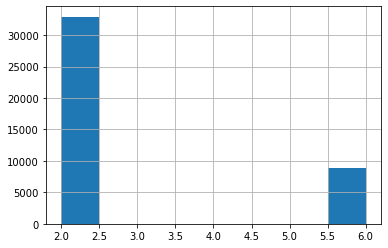

In [25]:
nmap_df['pred'].hist(bins=8)

<AxesSubplot:>

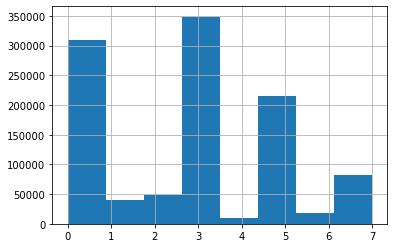

In [27]:
attack_df['pred'].hist(bins = 8)

In [28]:
nmap_df['pred'].value_counts()

2    32939
6     8885
Name: pred, dtype: int64

In [47]:
# Singluar value decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20, n_iter=5)

In [48]:
processed_normal_values = processed_normal.values
svd_normal = svd.fit_transform(processed_normal_values)

In [49]:
svd_normal

array([[ 1.45146131e+00, -4.15088193e-01, -4.44055410e+00, ...,
         2.59156325e-01, -3.91159104e-01,  8.00292207e-02],
       [ 1.55940594e+00,  4.50819651e-01, -3.38813331e+00, ...,
         1.76940992e-01, -3.18450016e-01,  3.35860040e-02],
       [-2.61184945e+00,  1.35937361e+00, -1.94147311e+00, ...,
         1.44851579e-01, -7.61096723e-02,  2.34367515e-01],
       ...,
       [-1.82277365e+00, -1.13910672e+00,  1.21354094e+00, ...,
        -1.42070869e+00, -7.43005967e-03, -2.08673868e-01],
       [-1.99533629e+00,  4.08198110e-01,  1.18036969e+00, ...,
         1.52685098e+00, -1.63839035e+00,  2.65859542e-01],
       [-1.81751073e+00, -1.13778174e+00,  1.21141819e+00, ...,
        -1.43009295e+00,  3.30228265e-03, -2.16117846e-01]])

In [52]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(30, input_dim=svd_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to
model.add(Dense(30, activation='relu'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=50)

Epoch 1/50


2022-03-18 16:48:58.838368: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-18 16:48:58.960227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 16s 4ms/step - loss: 0.6589
Epoch 2/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.4099
Epoch 3/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.3673
Epoch 4/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.3427
Epoch 5/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.3169
Epoch 6/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2961
Epoch 7/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2774
Epoch 8/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2647
Epoch 9/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2551
Epoch 10/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2470
Epoch 11/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2399
Epoch 12/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2344


In [55]:
model.save("auto_with_svd")

INFO:tensorflow:Assets written to: auto_with_svd/assets


2022-03-18 17:00:54.212522: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [56]:
svd_attack = svd.fit_transform(processed_attack.values)

In [60]:
pred = model.predict(svd_attack)

In [61]:
from sklearn import metrics
score_list = []
for index, x in enumerate(pred):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred[index],svd_attack[index])))

attack_df['score'] = score_list

<AxesSubplot:>

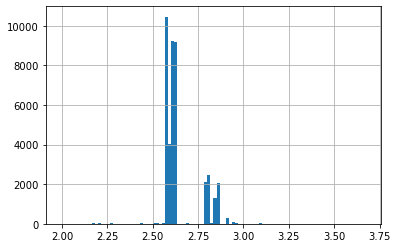

In [63]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
nmap_df["score"].hist(bins=100)

<AxesSubplot:>

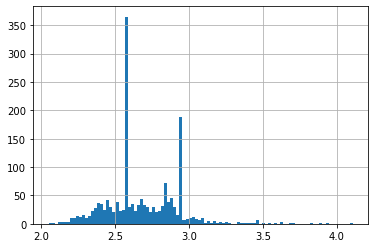

In [64]:
hello = attack_df[attack_df["ip.dst"] == '89.100.107.147']
hello["score"].hist(bins=100)

In [65]:
pred_normal = model.predict(x_normal_test)

In [67]:
hi = np.sqrt(metrics.mean_squared_error(pred_normal,x_normal_test))

In [68]:
hi

0.42842259380922065

In [69]:
hi2 = np.sqrt(metrics.mean_squared_error(model.predict(x_normal_train),x_normal_train))

In [70]:
hi2

0.42647637500592156

In [71]:
synthetic = pd.read_csv('data/synthetic_data.csv')

In [80]:
process_synthetic = process_df(synthetic)
svd_synthetic = svd.fit_transform(process_synthetic.values)
pred_syn = model.predict(svd_synthetic)
score_syn = []

for index, x in enumerate(pred_syn):
    score_syn.append(np.sqrt(metrics.mean_squared_error(pred_syn[index],svd_synthetic[index])))


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   4.,
          7.,   5.,   9.,  19.,  33.,  31.,  43.,  58.,  74.,  98., 133.,
        154., 188., 225., 269., 338., 437., 447., 495., 562., 614., 724.,
        718., 761., 810., 806., 850., 811., 892., 833., 776., 788., 703.,
        682., 624., 566., 563., 473., 444., 410., 352., 291., 269., 226.,
        204., 168., 162., 127., 106.,  76.,  99.,  66.,  45.,  50.,  36.,
         34.,  29.,  22.,  26.,  15.,  20.,  19.,  10.,  15.,  11.,   5.,
          5.,   5.,   4.,   2.,   3.,   3.,   1.,   5.,   2.,   1.,   0.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          1.]),
 array([0.43421265, 0.45656052, 0.47890839, 0.50125626, 0.52360413,
        0.54595199, 0.56829986, 0.59064773, 0.6129956 , 0.63534347,
        0.65769133, 0.6800392 , 0.70238707, 0.72473494, 0.7470828 ,
        0.76943067, 0.79177854, 0.81412641, 0.83647428, 0.85882214,
        0.88117001, 0.90351788, 0.92586575, 0.

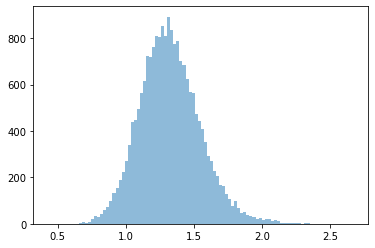

In [88]:
plt.hist(score_syn, bins=100, alpha=0.5)

<AxesSubplot:>

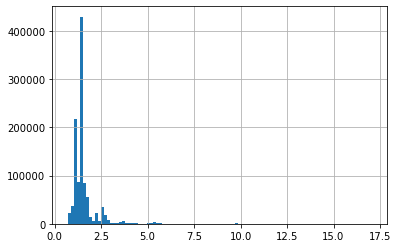

In [89]:
attack_df['score'].hist(bins = 100)